<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمایش روی نقشه
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌‌ی خانه‌های چین، مختصات جغرافیایی هر خانه مشخص است. با استفاده از تابع <code>scatter</code> کتابخانه‌ی مت‌پلات، می‌توان خانه‌ها را بر اساس موقعیت‌شان روی رسم کرد و سپس به تحلیل نقشه پرداخت. اطلاعات بسیار مفیدی از این نقشه‌ها قابل استخراج است. تراکم مناطق مختلف، ویژگی‌های خانه‌های هر منطقه (داشتن آسانسور، متراژ، قیمت و غیره) از اطلاعاتی هستند که می‌توان از این نموداری به‌دست آورد. در این گام از پروژه، نحوه‌ی رسم چنین نمودارهایی را با هم می‌بینیم.
</font> 
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا فایل <code>housing_extended.csv</code> را که در گام قبلی پروژه به‌دست آمد می‌خوانیم.
</font>
</p>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
housing_extended.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,2.032881,0.698472,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,2.032504,0.696064,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,2.032227,0.699460,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,2.032059,0.696146,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,2.032720,0.697981,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این گام از پروژه تنها از یک صدم سطر‌ها برای ترسیم نمودار‌ها استفاده می‌کنیم. دلیل این امر، جلوگیری از سنگین‌شدن نت‌بوک و فایل‌های خروجی می‌باشد. دیتافریمی که از آن استفاده می‌کنیم، <code>housing_sample</code> نام دارد که با انتخاب یک سطر از هر صد سطر دیتافریم <code>housing_extended</code> به‌وجود آمده است. در گام بعدی پروژه که گام نهایی نیز می‌باشد، از همان دیتافریم اصلی <code>housing_extended</code> استفاده می‌کنیم.
</font>
</p>

In [3]:
housing_sample = housing_extended.iloc[:-100:100]
housing_sample.shape

(2850, 20)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با داشتن طول و عرض جغرافیایی خانه‌ها،‌ می‌توانیم با کمک گرفتن از نمودار پراکندگی، خانه‌ها را روی صفحه رسم کنیم و موقعیت آن‌ها را نسبت به هم ببینیم. مقیاس محور افقی و عمودی نمودار باید برابر باشد. برای یکسان کردن مقیاس محور افقی و عمودی از متد <code>ax.axis(‘equal’)</code> استفاده می‌کنیم.
</font>
</p>

Text(0.5, 1.0, 'scatter plot')

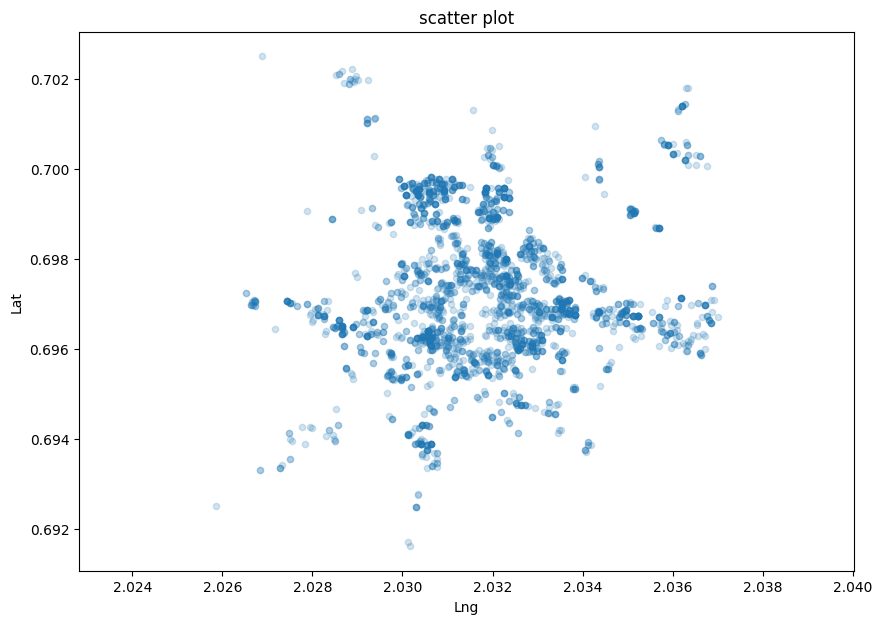

In [4]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax1, kind='scatter', alpha=0.2)
ax1.axis('equal')
ax1.set_title('scatter plot')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مشاهده می‌کنید که اکثر خانه‌ها در یک نقطه جمع شده‌اند که همان مرکز پایتخت چین می‌باشد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تعیین رنگ نقاط
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در نمودار <code>scatter</code> با تنظیم مقدار برای متغیر <code>c</code> و <code>s</code> می‌توان به‌ترتیب رنگ و اندازه‌ی نقاط را مشخص کرد و نموداری حاوی اطلاعات ارزشمندتری رسم کرد. برخلاف تابع <code>plot</code> که در آن فقط یک رنگ برای همه‌ی نقاط مشخص می‌کردیم، در تابع <code>scatter</code> این کار با یک مجموعه نقطه و یک نگاشت رنگ انجام می‌شود. یعنی به‌ازای هر نقطه یک  رنگ یا عدد وجود دارد که این عدد بعداً به کمک نگاشت رنگ <code>(color map)</code> به یک رنگ تبدیل می‌شود.
<br>
ما قصد داریم برای تعیین رنگ نقاط از <b>قیمت هر متر مربع</b> استفاده می‌کنیم. یعنی قیمت هر خانه با تابع نگاشت رنگ تبدیل به رنگی برای آن نقطه روی نقشه می‌شود. به دلیل استفاده از نگاشت رنگ <code>jet</code>، هر چه قیمت بیشتر باشد، رنگ بیشتر به سمت رنگ‌های گرم می‌رود. 
</font>
</p>

(2.02529006213284, 2.037554583289055, 0.6910779438991503, 0.7030503964223485)

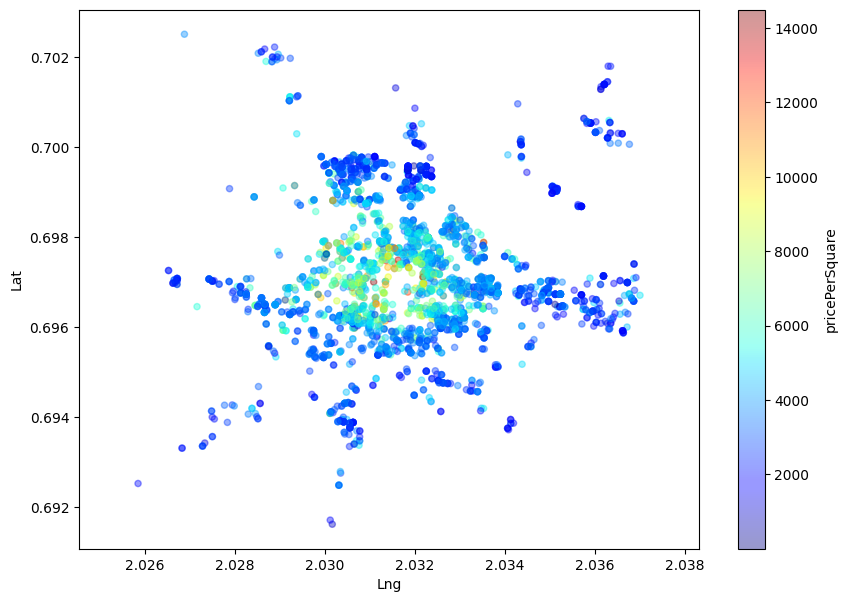

In [5]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax2, kind='scatter', alpha=0.4,
                    c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax2.axis('equal')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار بالا نشان می‌دهد که گران‌ترین خانه‌ها (بر اساس هر متر مربع) در نزدیکی مرکز شهر قرار دارند و با دور شدن از مرکز شهر، قیمت‌ها چگونه کاهش می‌یابد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از صفحه‌محور ایجاد شده در کد قبل استفاده کنید و با استفاده از متد <code>annotate</code> مرکز شهر را بر روی نمودار پراکندگی اضافه کنید. دقت کنید که نمودار آماده است و فقط باید <code>annotation</code> را اضافه کنید.

<ul dir =rtl>
  <li>
      محل قرار گرفتن متن، نقطه‌ی <code>(116.6 , 39.65)</code> می‌باشد.
</li>

  <li>
      محل قرار گیری انتهای فلش، نقطه‌ی <code>(116.40, 39.90)</code> می‌باشد.
</li>


  <li>
متن نمایشی را برابر <code>center of beijing</code> قرار دهید.</li>

  <li>
نوع اتصال را برابر <code>connectionstyle</code> قرار دهید (شیء آن ساخته شده است).
</li>
  <li>
نوع فلش را برابر <code>fancy</code> قرار دهید.</li>
</ul>
</font>
</p>

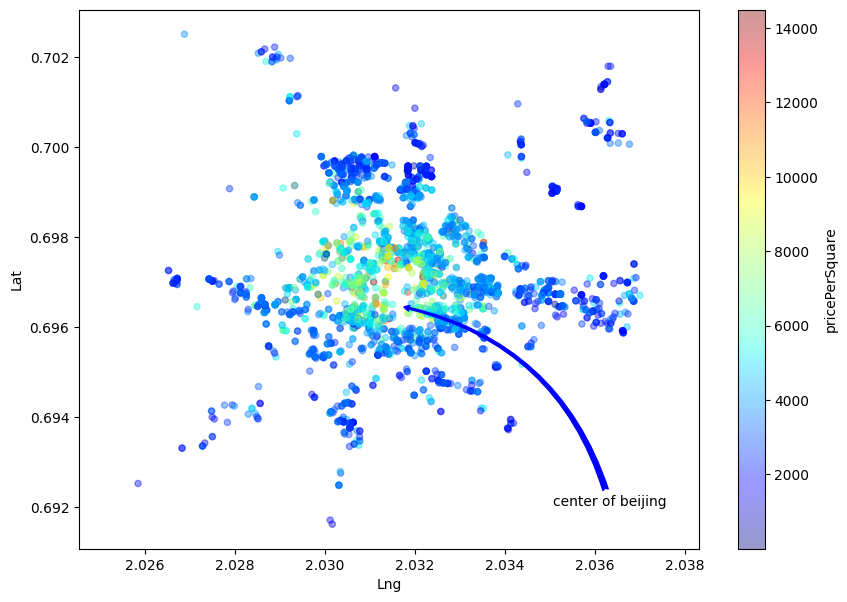

In [6]:
from matplotlib.patches import ConnectionStyle
import numpy as np
connectionstyle = ConnectionStyle("Arc3", rad=0.3)
capital_Lng = np.radians(116.4074)
capital_Lat = np.radians(39.9042)
capital_Lng_S = np.radians(116.6)
capital_Lat_S = np.radians(39.65)
ax2.annotate('center of beijing',xy=(capital_Lng,capital_Lat),xytext=(capital_Lng_S,capital_Lat_S),arrowprops=dict(arrowstyle='fancy',connectionstyle=connectionstyle,color='blue'))
fig2

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که در درسنامه‌ی «تنظیمات (۱)» از فصل «مصورسازی داده» دیدیم، تا وقتی‌که متد <code>clear</code> را صدا نزنید،‌ نمودار پاک نمی‌شود و اشکال بر روی اشکال قبلی رسم می‌شوند. یعنی هر بار که کد بالا را اجرا می کنید،‌ یک <code>annotation</code> جدید روی قبلی رسم می‌شود. برای جلوگیری از این کار،‌ پس از نوشتن کد صحیح، سلول ایجاد شکل و سلول اضافه کردن <code>annotation</code> را یک‌بار دیگر اجرا کنید و بررسی کنید که در سلول زیر فقط یک شیء <code>text</code> باشد. 
</font>
</p>

In [8]:
ax2.texts

<Axes.ArtistList of 1 texts>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تعیین اندازه‌ی نقاط</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون با متغیر <code>s</code> سایز نقاط را مشخص می‌کنیم. می‌توانیم فاصله‌ی هر خانه از مرکز شهر را به‌عنوان معیاری برای اندازه‌ی نقاط انتخاب کنیم. به شکل زیر توجه کنید:
</font>
</p>

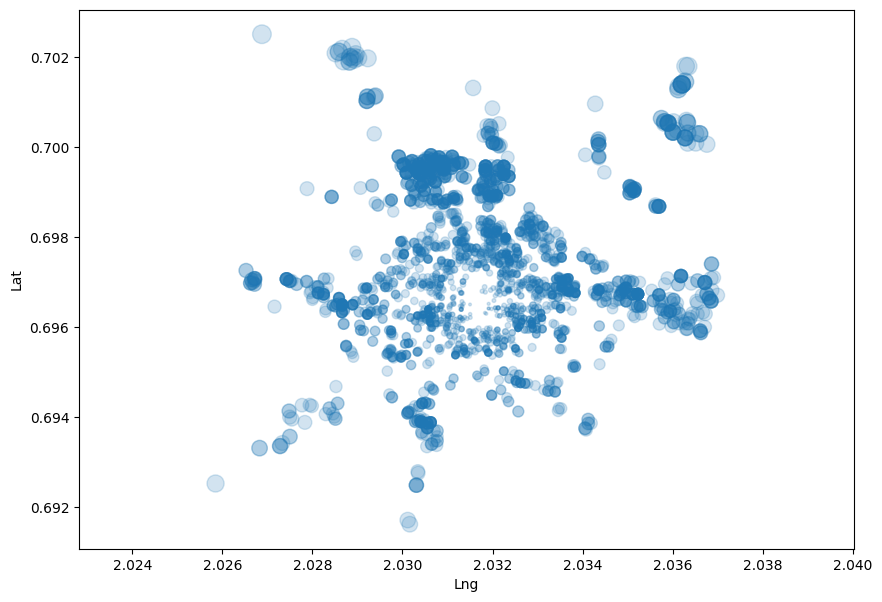

In [7]:
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax3, kind = 'scatter', alpha = 0.2,\
    s = housing_sample['distanceToCapital'] * 4)

ax3.axis('equal');

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در شکل بالا رنگ همه‌ی نقاط یکسان است ولی اندازه‌ی آنها متناسب با فاصله‌ی هر خانه از مرکز شهر مشخص شده است. هر چه این عدد بزرگ‌تر باشد، نقاط روی نمودار بزرگتر نمایش داده می‌شوند. ضریب ۴ برای ۴ برابر شدن اندازه‌ی همه‌ی نقاط است. انتخاب ضریب نیاز به کمی آزمون و خطا دارد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌توان عکس این منطقه از جهان را پشت نقاط رسم شده قرار داد تا دیدی واقعی‌تر نسبت به محل قرار‌گیری خانه‌ها به‌دست آوریم. با استفاده از محدوده‌ی محور افقی و عمودی نمودار، محدوده‌ی مورد نظر را با استفاده از نقشه‌های گوگل دریافت کرده‌ایم که در عکس <code>map1</code>  ذخیره شده است. با استفاده از متد <code>imshow</code> این عکس را پشت نمودار قرار می‌دهیم:
</font>
</p>

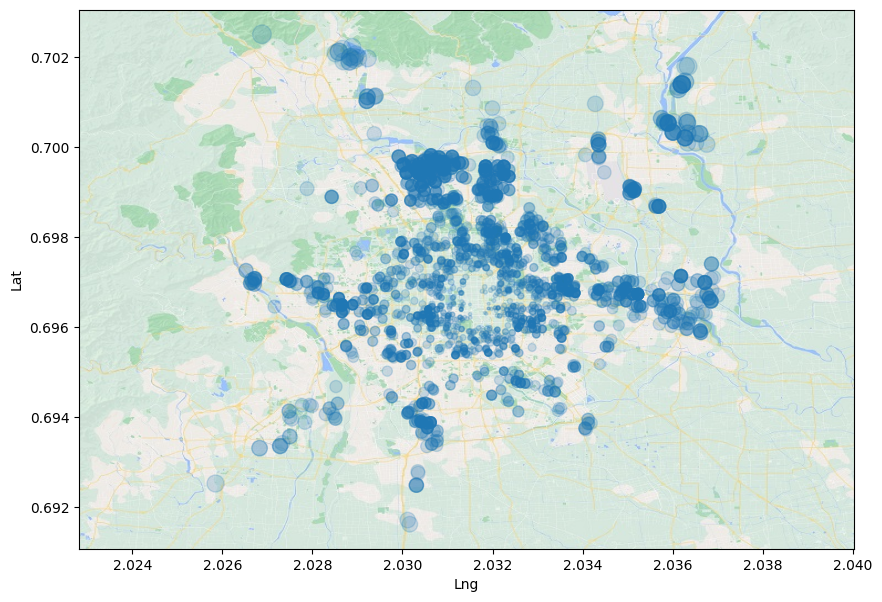

In [8]:
import matplotlib.image as mpimg
xmin,xmax=ax3.get_xlim()
ymin,ymax=ax3.get_ylim()
beijing_img = mpimg.imread('map1.jpg')
ax3.imshow(beijing_img, extent=[xmin,xmax,ymin,ymax],aspect='auto',zorder=-1)
fig3

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
توضیحات پارامتر <code>extent</code>
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
وقتی از متد <code>imshow</code> استفاده می‌کنیم، باید حواس‌مان باشد که عکس در چه نقطه‌ای رسم می‌شود. در حالت حادی عکس در مختصات <code>(0,0)</code> رسم می‌شود و به اندازه‌ی تعداد پیکسل‌های عکس، روی نمودار کش داده می‌شود. اگر به نمودار قبلی دقت کرده باشید می‌بینید که نمودار خانه‌ها در حدود بازه‌ی <code>115</code> تا <code>117</code> محور افقی و بازه‌ی <code>39.6</code> تا <code>40.2</code> بازه‌ی عمودی رسم‌ شده است.
<br>
ما ابتدا با استفاده از متد <code>get_xlim</code> و <code>get_ylim</code> بازه‌ی دقیق نمودار قبلی را به‌دست آوردیم سپس با استفاده از پارامتر <code>extent</code> محدوده‌ی رسم عکس را دقیقاً بر روی نمودار قبلی منطبق کردیم.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    نمودار شکل قبل‌ را در ابعاد <code>12.5</code> در <code>7</code> اینچ بکشید و این ‌بار از ستون منطقه (<code>district</code>)  برای رنگ دادن به نقاط استفاده کنید. برای تعیین سایز نقاط هم از ستون متراژ (<code>square</code>) استفاده کنید. توجه داشته باشید که به‌دلیل بزرگ بودن اعداد ستون متراژ، آن‌ها را تقسیم بر ۲۰ کنید. از نگاشت رنگ <code>nipy_spectral</code>
    برای تبدیل اعداد به رنگ استفاده کنید. مقدار <code>alpha</code>  را نیز برابر <code>0.6</code> قرار دهید.
<br>
<br>
<p style="text-align:center; background-color:white"><img src="output.png"></p></font>
</p>


(2.02529006213284, 2.037554583289055, 0.6910779438991503, 0.7030503964223485)

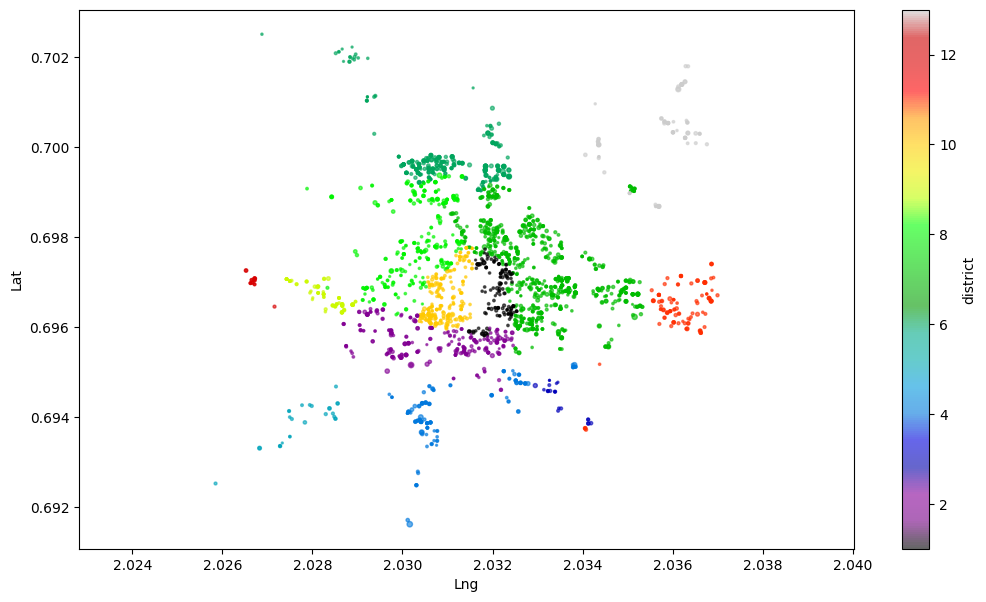

In [9]:
fig4,ax4 = plt.subplots()
fig4.set_size_inches(12.5,7)
housing_sample.plot(x='Lng', y='Lat', ax=ax4, kind='scatter', alpha=0.6,
                    c='district', cmap='nipy_spectral', colorbar=True,s = housing_sample['square']/20)
ax4.axis('equal')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال نمودار ایجاد‌شده در قسمت دوم را با اعمال این تغییرات دوباره ترسیم کنید:
<ul dir=rtl>
  <li>
فقط خانه‌هایی که در فاصله‌ی بین ۱۰ تا ۳۰ کیلومتری از مرکز هستند را رسم کنید (خود ۱۰ و ۳۰ در بازه نیستند).
</li>
  <li>
به جای فایل <code>map1</code> از فایل <code>map2</code> در زمینه‌ی عکس استفاده کنید.
</li>

</ul>

</font>
</p>



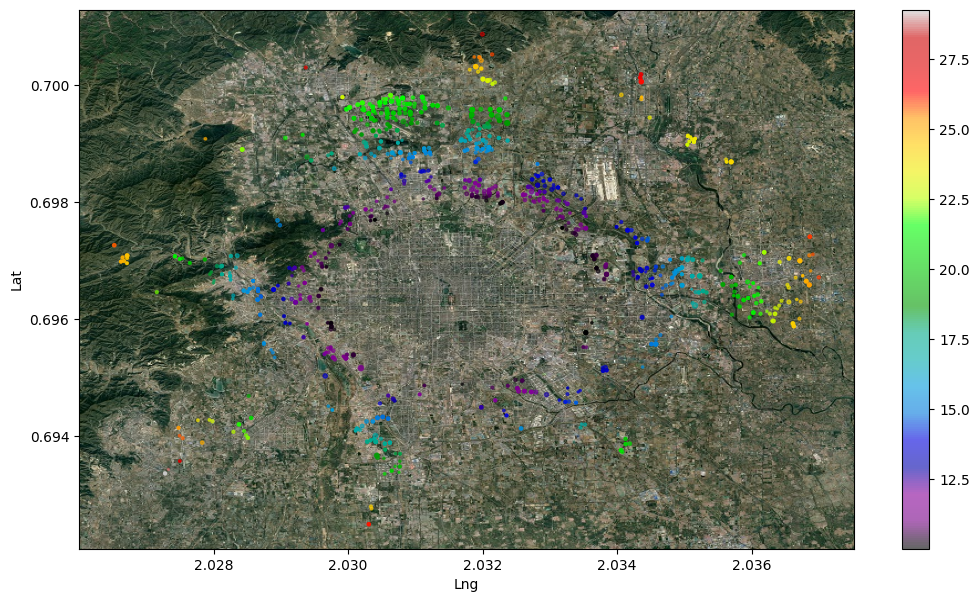

In [14]:
housing_sample_10_30=housing_sample[(housing_sample['distanceToCapital']>10) & (housing_sample['distanceToCapital']<30)]
fig5,ax5 = plt.subplots()
fig5.set_size_inches(12.5,7)
housing_sample_10_30.plot(x='Lng', y='Lat', ax=ax5, kind='scatter', alpha=0.6,
                    c=housing_sample_10_30['distanceToCapital'], cmap='nipy_spectral', colorbar=True,s =housing_sample_10_30 ['square']/20)
ax5.axis('equal')
xmin,xmax=ax5.get_xlim()
ymin,ymax=ax5.get_ylim()
beijing_img = mpimg.imread('map2.jpg')
ax5.imshow(beijing_img, extent=[xmin,xmax,ymin,ymax],aspect='auto',zorder=-1)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این گام تغییری در دیتافریم ندادیم و در گام بعد هم دوباره از فایل <code>housing_extended.csv</code> استفاده خواهیم کرد.
</font>
</p>
